In [0]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, TimeDistributed, Dropout, Softmax
from tensorflow.keras.layers import LSTM, Conv2D, MaxPooling2D, Flatten, Reshape
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras import models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from random import randint
from tensorflow.keras import optimizers
from sklearn.preprocessing import OneHotEncoder

In [0]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
#x_train.shape

In [40]:

print("shape", x_train.shape)

shape (60000, 28, 28)


<Figure size 432x288 with 0 Axes>

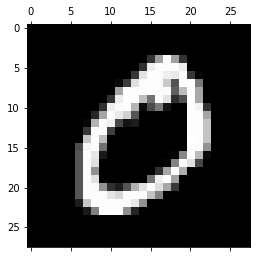

In [39]:
plt.gray()
plt.matshow(x_train[1])
plt.show()

<Figure size 432x288 with 0 Axes>

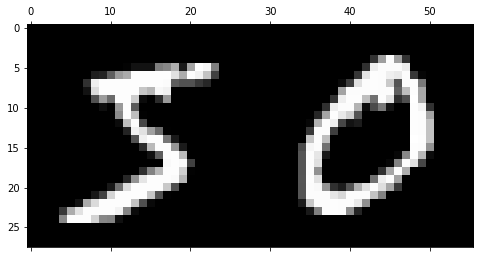

In [42]:
img1 = x_train[0]
img2 = x_train[1]
twoAtOne = np.concatenate((img1, img2), axis=1)
plt.gray()
plt.matshow(twoAtOne)
plt.show()


In [16]:
onehot_encoder = OneHotEncoder(sparse=False)
y_train_reshpaed = y_train.reshape(len(y_train), 1)
onehot_encoded = onehot_encoder.fit_transform(y_train_reshpaed).reshape(len(y_train),1,10)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [0]:

txtLen = 6
randSamplesNum = 1000
imgsNum = len(x_train)
xList = []
yList = []
for i in range(randSamplesNum):
    tmpImgNum = randint(0, imgsNum-1)
    tmpConcImgs = x_train[tmpImgNum]
    tmpLabels = onehot_encoded[tmpImgNum]
    for j in range(txtLen-1):
        tmpImgNum = randint(0, imgsNum-1)
        tmpConcImgs = np.concatenate((tmpConcImgs, x_train[tmpImgNum]), axis=1)
        tmpLabels = np.concatenate((tmpLabels, onehot_encoded[tmpImgNum]))
    xList.append(tmpConcImgs)
    yList.append(tmpLabels)
xData = np.array(xList)
yData = np.array(yList)

In [18]:
yData.shape

(1000, 6, 10)

In [19]:
yData[:3]

array([[[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]]])

In [20]:
xData.shape

(1000, 28, 168)

In [21]:
xData = xData.reshape(-1, 28,28*txtLen,1)
xData.shape

(1000, 28, 168, 1)

In [0]:
xData.shape

In [0]:
def OneHotDecode(x):
  tmpOut = []
  #for v in x:
    #tmpOut.append(np.argmax(v))
  return np.argmax(x, axis=1)
  #return np.array(tmpOut)

In [0]:
OneHotDecode(yData[0])

In [24]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3,3), strides=(2,2),padding="same",activation="relu", input_shape = (28,168,1), data_format="channels_last"))
model.add(Conv2D(32, kernel_size=(3,3), strides=(2,2), padding="same", activation="relu", data_format="channels_last"))
model.add(Conv2D(43, kernel_size=(3,3), strides=(2,2), padding="same", activation="relu", data_format="channels_last"))
model.add(Conv2D(40, kernel_size=(3,3), strides=(2,2), padding="same", activation="relu", data_format="channels_last"))
model.add(Conv2D(48, kernel_size=(3,3), strides=(2,2), padding="same", activation="relu", data_format="channels_last"))
model.add(Dropout(0.4))
model.add(Reshape((6,48))) ### Zmieniamy wymiar aby pasowao pod LSTM, 64 oznacza wymiar ostatniej konwolucji
model.add(LSTM(64, return_sequences=True, activation="relu"))
model.add(LSTM(32, return_sequences=True, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 14, 84, 16)        160       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 42, 32)         4640      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 21, 43)         12427     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 2, 11, 40)         15520     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 1, 6, 48)          17328     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 6, 48)          0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 6, 48)            

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 14, 84, 16)        160       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 42, 32)         4640      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 21, 43)         12427     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 2, 11, 40)         15520     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 1, 6, 48)          17328     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 6, 48)          0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 6, 48)            

In [0]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["categorical_accuracy"])

In [0]:
xData = xData/255
xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size=0.2, random_state=2)


In [29]:
history = model.fit(xTrain, yTrain, epochs=100, batch_size=200, verbose=1)

Epoch 1/100
800/800 [==============================] - 1s 1ms/sample - loss: 0.3584 - categorical_accuracy: 0.8740
Epoch 2/100
800/800 [==============================] - 1s 1ms/sample - loss: 0.3631 - categorical_accuracy: 0.8740
Epoch 3/100
800/800 [==============================] - 1s 1ms/sample - loss: 0.3480 - categorical_accuracy: 0.8817
Epoch 4/100
800/800 [==============================] - 1s 1ms/sample - loss: 0.3606 - categorical_accuracy: 0.8798
Epoch 5/100
800/800 [==============================] - 1s 1ms/sample - loss: 0.3315 - categorical_accuracy: 0.8910
Epoch 6/100
800/800 [==============================] - 1s 1ms/sample - loss: 0.3448 - categorical_accuracy: 0.8823
Epoch 7/100
800/800 [==============================] - 1s 1ms/sample - loss: 0.3314 - categorical_accuracy: 0.8867
Epoch 8/100
800/800 [==============================] - 1s 1ms/sample - loss: 0.3286 - categorical_accuracy: 0.8883
Epoch 9/100
800/800 [==============================] - 1s 1ms/sample - loss: 0.3

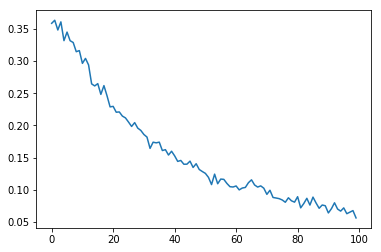

In [30]:

plt.plot(history.history['loss'])

In [31]:
model.evaluate(xTest, yTest)

200/200 [==============================] - 0s 1ms/sample - loss: 0.4866 - categorical_accuracy: 0.9067


[0.48662755012512204, 0.9066667]